<a href="https://colab.research.google.com/github/mskhan1103/CNN/blob/main/vgg16_transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow keras kaggle --quiet

import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam


In [ ]:
# Place your kaggle.json in /root/.kaggle/
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download Cats vs Dogs dataset
!kaggle datasets download -d tongpython/cat-and-dog
!unzip cat-and-dog.zip -d /content/dataset


Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset/training_set/training_set/cats/cat.3704.jpg  
  inflating: /content/dataset/training_set/training_set/cats/cat.3705.jpg  
  inflating: /content/dataset/training_set/training_set/cats/cat.3706.jpg  
  inflating: /content/dataset/training_set/training_set/cats/cat.3707.jpg  
  inflating: /content/dataset/training_set/training_set/cats/cat.3708.jpg  
  inflating: /content/dataset/training_set/training_set/cats/cat.3709.jpg  
  inflating: /content/dataset/training_set/training_set/cats/cat.371.jpg  
  inflating: /content/dataset/training_set/training_set/cats/cat.3710.jpg  
  inflating: /content/dataset/training_set/training_set/cats/cat.3711.jpg  
  inflating: /content/dataset/training_set/training_set/cats/cat.3712.jpg  
  inflating: /content/dataset/training_set/training_set/cats/cat.3713.jpg  
  inflating: /content/dataset/training_set/training_set/cats/cat.3714.jpg  
  inflating: /content/dataset/training

In [ ]:
train_dir = '/content/dataset/training_set/training_set'
val_dir = '/content/dataset/test_set/test_set'

# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='binary'
)


Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [ ]:
# Load VGG16 without the top classification layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers
x = base_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)  # Binary classification

model = Model(inputs=base_model.input, outputs=predictions)


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,
    epochs=10
)


Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.


Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 138s 491ms/step - accuracy: 0.7572 - loss: 0.4969 - val_accuracy: 0.8775 - val_loss: 0.2748
Epoch 2/10
  1/250 ━━━━━━━━━━━━━━━━━━━━ 40s 162ms/step - accuracy: 0.8438 - loss: 0.3506

Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.


250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - accuracy: 0.8438 - loss: 0.3506 - val_accuracy: 0.8686 - val_loss: 0.2907
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 202s 589ms/step - accuracy: 0.8632 - loss: 0.3105 - val_accuracy: 0.9137 - val_loss: 0.2065
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 11s 43ms/step - accuracy: 0.8438 - loss: 0.2737 - val_accuracy: 0.9177 - val_loss: 0.1958
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 118s 470ms/step - accuracy: 0.8743 - loss: 0.2824 - val_accuracy: 0.9167 - val_loss: 0.2073
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 12s 46ms/step - accuracy: 0.8750 - loss: 0.3478 - val_accuracy: 0.9196 - val_loss: 0.1951
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 119s 476ms/step - accuracy: 0.8848 - loss: 0.2635 - val_accuracy: 0.9231 - val_loss: 0.1918
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 12s 46ms/step - accuracy: 0.6000 - loss: 0.4929 - val_accuracy: 0.9196 - val_loss: 0.2048
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 118s 474ms/step - accuracy: 0.8979 - loss: 0.2458 - val

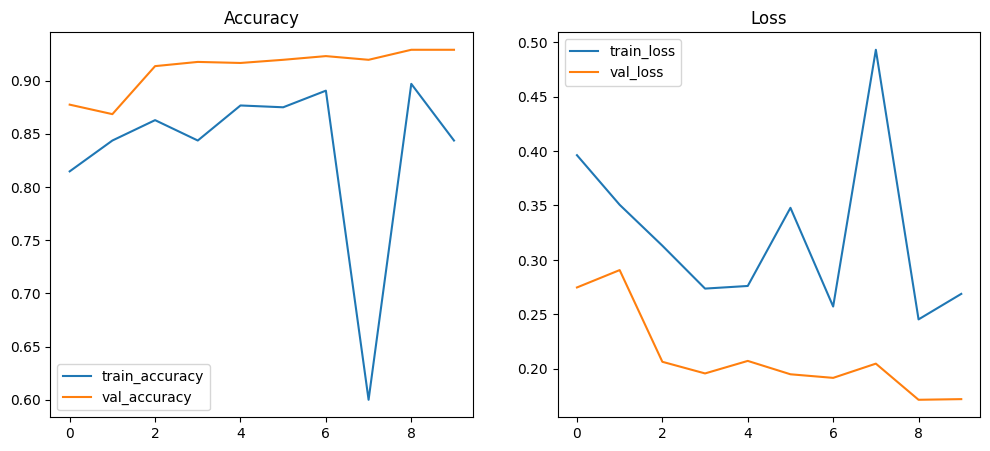

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.title('Loss')
plt.show()


**Fine** - **Tunning**


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.01),
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,
    epochs=5
)


Epoch 1/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 123s 482ms/step - accuracy: 0.7360 - loss: 5.2120 - val_accuracy: 0.8834 - val_loss: 0.2814
Epoch 2/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 11s 44ms/step - accuracy: 0.8750 - loss: 0.3584 - val_accuracy: 0.8452 - val_loss: 0.3353
Epoch 3/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 142s 569ms/step - accuracy: 0.7971 - loss: 0.4278 - val_accuracy: 0.9028 - val_loss: 0.2213
Epoch 4/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 12s 47ms/step - accuracy: 0.9688 - loss: 0.1792 - val_accuracy: 0.9028 - val_loss: 0.2238
Epoch 5/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 118s 473ms/step - accuracy: 0.7875 - loss: 0.4779 - val_accuracy: 0.8864 - val_loss: 0.2460


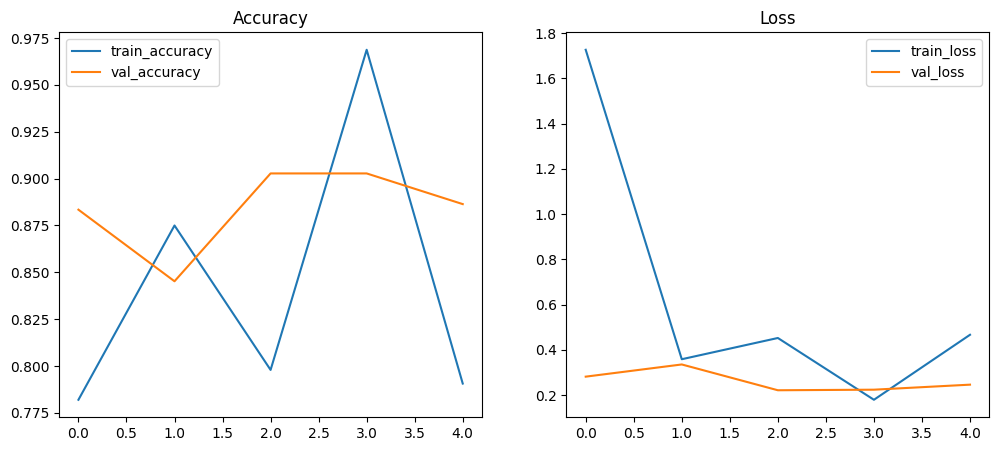

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.title('Loss')
plt.show()
